**Chapter 10 – Introduction to Artificial Neural Networks with Keras**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [2]:
import tensorflow as tf
from tensorflow import keras  # tf.keras

print(tf.__version__, keras.__version__)

2.7.0 2.7.0


# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [ ]:
y_pred

array([1])

Saving figure perceptron_iris_plot


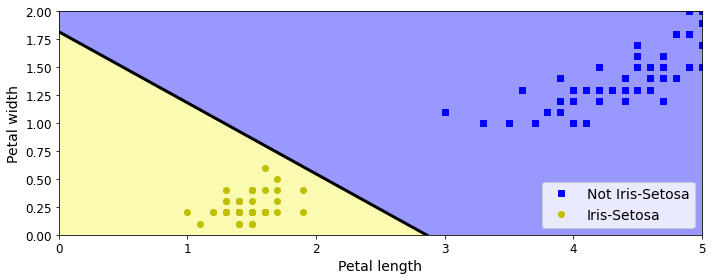

In [ ]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


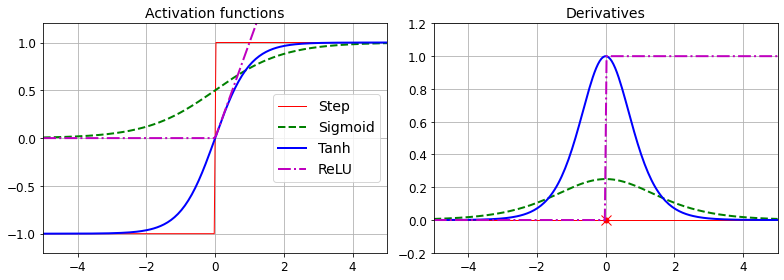

In [ ]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [ ]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

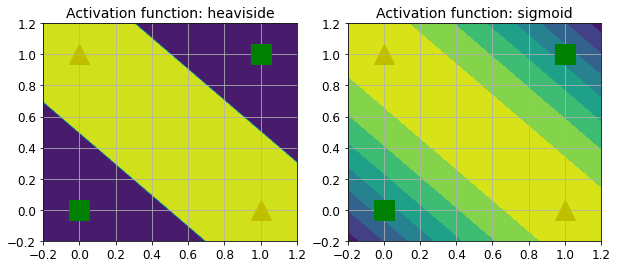

In [ ]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

## Preparation

First let's import TensorFlow and Keras.

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
tf.__version__

'2.7.0'

In [5]:
keras.__version__

'2.7.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [7]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [8]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set.

**Since we are going to train the neural network using Gradient Descent, we must scale the input features. We do so by scaling the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.**

In [10]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.  # . is to convert them to floats
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

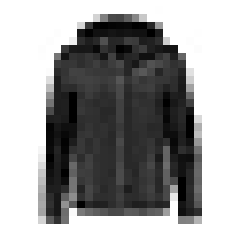

In [13]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [14]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [16]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images (28 * 28 pixels):

In [17]:
X_valid.shape

(5000, 28, 28)

In [18]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

Saving figure fashion_mnist_plot


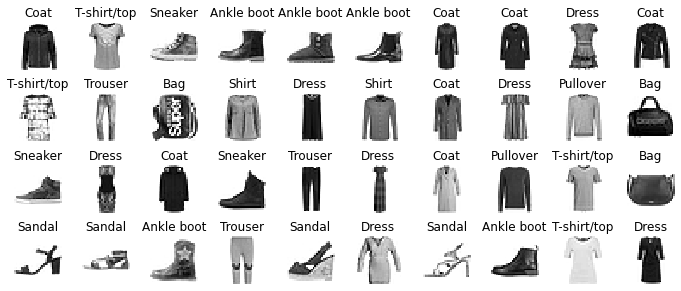

In [19]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

## Creating the model using the Sequential API

This is a classification MLP with two hidden layers.

In [21]:
model = keras.models.Sequential()  
# This creates a sequential model. This is just composed of a single slack of layers connected sequentially.

model.add(keras.layers.Flatten(input_shape=[28, 28]))
# This is the first layer. It is a Flatten layer whose role is to convert each input image into a 1D array:
# if it receives input data X, it computes X.reshape(-1, 1)
# Since it is the first layer of the model, we should specify the 'input_shape', which doesn't include the batch size but
# only the shape of the instances. Alternatively, you could use keras.layers.InputLayer as the first layer instead.

model.add(keras.layers.Dense(300, activation="relu"))
# This is a Dense hidden layer with 300 neurons. It uses the ReLU activation function.
# Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs.
# It also manages a vector of bias terms. When it receives some input data, it computes Equation 10-2 (See Note).

model.add(keras.layers.Dense(100, activation="relu"))
# The Second Dense hidden layer with 100 neurons. It uses the ReLU activation function.

model.add(keras.layers.Dense(10, activation="softmax"))
# A Dense output layer with 10 neurons using the softmax activation function because the classes are exclusive.

In [22]:
keras.backend.clear_session()  # Clearing the keras models I guess?
np.random.seed(42)
tf.random.set_seed(42)

Instead of adding the layers by .add() one by one, we can pass a list of layers when creating the Sequential model.

In [23]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
model.layers  # To see the layers of a model

summary() method displays all the model's layers, including each layer's name (which is automatically generated when not given any), its output shape, and its number of parameters. The summary ends with the total number of parameters, incluidng the trainable parameters and non-trainiable parameters.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Looks like we have trainable parameters only.  
  
Also notice that the Dense layers often have a lot of parameters. This gives the model a lot of flexibility to fit the training data, but it also means that the model is at risk of overfitting, especially when we don't have enough training data.

I guess we can also get a plot of the model like this?

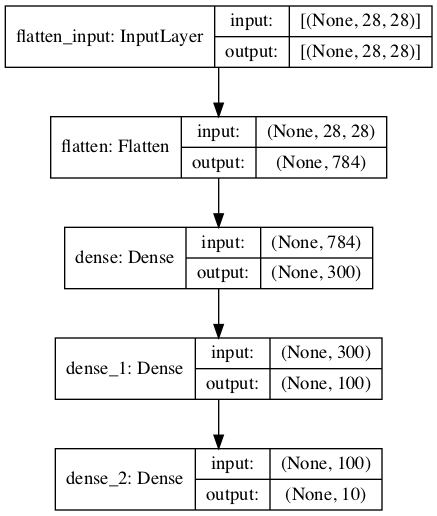

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You can also access each layer and get its name like this

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

and their weights and biases as well

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

Note that the Dense layer initialized the connection weights randomly, and the biases were initialized to zeros. We can also use different initialization using kernel_intializer or bias_initializer when creating the layer. This will be discussed more in ch11.

## Compiling

After a model is created, we must call its compile() method to specify the loss function and the optimizer to use. We can also specify a list of extra metrics to compute during training and evaluation.

In [28]:
model.compile(loss="sparse_categorical_crossentropy",  
              # This is set for loss because we have sparse labels (0-9) and the classes are exclusive.
              # If we had a one-hot vector, ex) represents 3 as 0, 0, 0, 1, 0, ..., 0 (instead of just 3),
              # We would then need to use 'categorical_crossentropy' loss instead.
              # If we had a binary classification, we would then use 'sigmoid (i.e., logistic)' activation function in the output layer
              # instead of the 'softmax' activation function, and we would use 'binary_crossentropy' loss instead.
              
              optimizer="sgd",  # We are using Stochastic Gradient Descent to train the model (Keras will perform the backpropagation algo.).
              
              metrics=["accuracy"])  # Since this is a classification, we are going to measure its accuracy during training and evaluation.

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

This is better because this way, we can set 'lr (the learning rate)' of SGD which is important to tune.

## Training and evaluating the model

In [ ]:
history = model.fit(X_train, y_train, epochs=30,  # running for n epochs
                    validation_data=(X_valid, y_valid))  # validation is optional but very useful to see how well it really performs.
                    
                                                         # We can also set 'validation_split' = 0.1 instead to tell Keras to use the last
                                                         # 10% of the data (before shuffling) for validation.

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 1.0187 - accuracy: 0.6807 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 2s 921us/step - loss: 0.5028 - accuracy: 0.8260 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 2s 881us/step - loss: 0.4485 - accuracy: 0.8423 - val_loss: 0.5334 - val_accuracy: 0.7982
Epoch 4/30
1719/1719 [==============================] - 2s 902us/step - loss: 0.4209 - accuracy: 0.8535 - val_loss: 0.3916 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 2s 908us/step - loss: 0.4061 - accuracy: 0.8580 - val_loss: 0.3750 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 2s 916us/step - loss: 0.3755 - accuracy: 0.8669 - val_loss: 0.3709 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 2s 879us/step - loss: 0.3655 - accuracy: 0.8711 - val_loss: 0.3618 - v

**If the performance of the training set is much better than on the validation set, the model is probably overfitting the training set.**  

  

You can also ask for any other metrics to show.

We can see that the training loss went down, which is a good sign, and the validation accuracy reached 89% after just 30 epochs and its not too far away from the training accuracy either so there is not much overfitting going on here.

If the training set was very skewed, it would be useful to set the 'class_weight' argument when calling the fit() method, which would give a larger weight to underrepresented classes and a lower weight to overrepresented classes. These weights would be used by Keras when computing the loss.   

If we need pre-instance weights, set the 'sample_weight' argument (which supersedes 'class_weight'). Per-instance weights could be useful if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former. You can also provide sample weights for the validation set by adding them as a third item in the validation_data tuple.

The fit() method returns a History object which contains the training parameters, the list of epochs it went through, **and most importantly a dictionary containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any).**

**You can use this dictionary to create pd.DataFrame and call its plot() method to get the learning curves.**

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


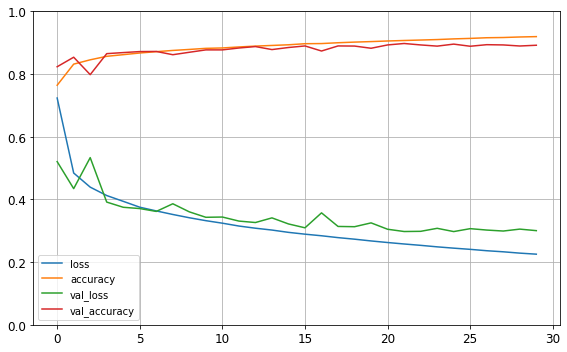

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

You can see that both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. Also, the validation curves are close to the training curves, which means there isn't much overfitting.

Note, the validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. So if the training curve is shifted by half an epoch to the left, the training and validation curves overlap almost perfectly at the beginning.

Therefore, when plotting the training curve, it should be shifted by half an epoch to the left.

## Hyperparameter tuning

The first one to check is the learning rate.   

You can try another optmizer (and always retune the learning rate after changing any hyperparameter).   

You can also try tuning the number of layers, the number of neurons per layer, and the types of activation functions to use for each hidden layer.

You can also try tuning the 'batch_size' (this is set in .fit() and the default is 32).

Once you are satisfied with the model (and its validation accuracy), you should evaluate it on the test set to estimate the generalization error before you deploy the model to production. This is easily done using .evaluate()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 639us/step - loss: 0.3357 - accuracy: 0.8837


[0.3357059359550476, 0.8837000131607056]

**Remember to resist the temptation to tweak the hyperparameters on the test set.**

## Using the model to make predictions

We can use the model's predict() method to make predictions on new instances.

In [ ]:
X_new = X_test[:3]  # Since we don't have any new instance, we will just use the first three instances of the test set.
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

As you can see, for each instance the model estimates the probability per class (0-9). For example, for the first image, it estimates that the prob. of class 9(ankle boot) is 96% while class 7(sneaker) is 3% and class 5(sandal) is 1% and the others' prob. are negligible. This means that it "believes" that the first image is a footwear, and most likely it's ankle boot but possibly sneaker or sandal.

IF you only care about the class with the highest estimated prob., then you can use np.argmax(model.predict(), axis=-1) instead. But beware that the highest prob. can also be quite low, so the interpretation might be trickier.

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

In [ ]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

So these are the predicted classes with the highest prob.

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

These are the actual classes and it looks like we have predicted them all very well.

Saving figure fashion_mnist_images_plot


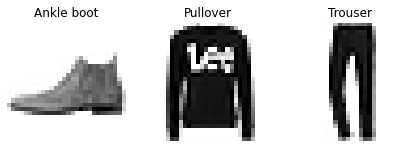

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()  # Recall that since we are going to train the neural network using Gradient Descent, 
                           # we must scale the input features. 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

The main differences from the Image Classifier we've done previously: the output layer has a single neuron, and it uses no activation function and lastly, the loss function is mean squared error.

Here the dataset is quite noisy, so we just use a single hidden layer with fewer neurons to avoid overfitting.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),  
    # The first layer is a Dense layer with 30 neurons, 
    # and since it is the first layer, input_shape must be specified.

    keras.layers.Dense(1)
    # The output layer has a single neuron since we only want to predict a single value.
])

# Compiling
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))


# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 [==============================] - 0s 893us/step - loss: 2.2656 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 670us/step - loss: 0.7413 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 661us/step - loss: 0.6604 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 640us/step - loss: 0.6245 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 688us/step - loss: 0.5770 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 668us/step - loss: 0.5609 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 667us/step - loss: 0.5500 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 647us/step - loss: 0.5200 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 683us/step - loss: 0.5051 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 679us/step - loss: 0.491

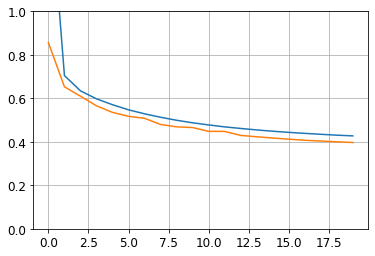

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

The blue line is the training loss and the orange line is the validation loss. We can see that both are decreasing.

In [ ]:
# Prediction
X_new = X_test[:3]
y_pred = model.predict(X_new)

y_pred

array([[0.3885664],
       [1.6792021],
       [3.1022797]], dtype=float32)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

It connects all or part of the inputs directly to the output layer. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). 

In contrast, a regular MLP forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

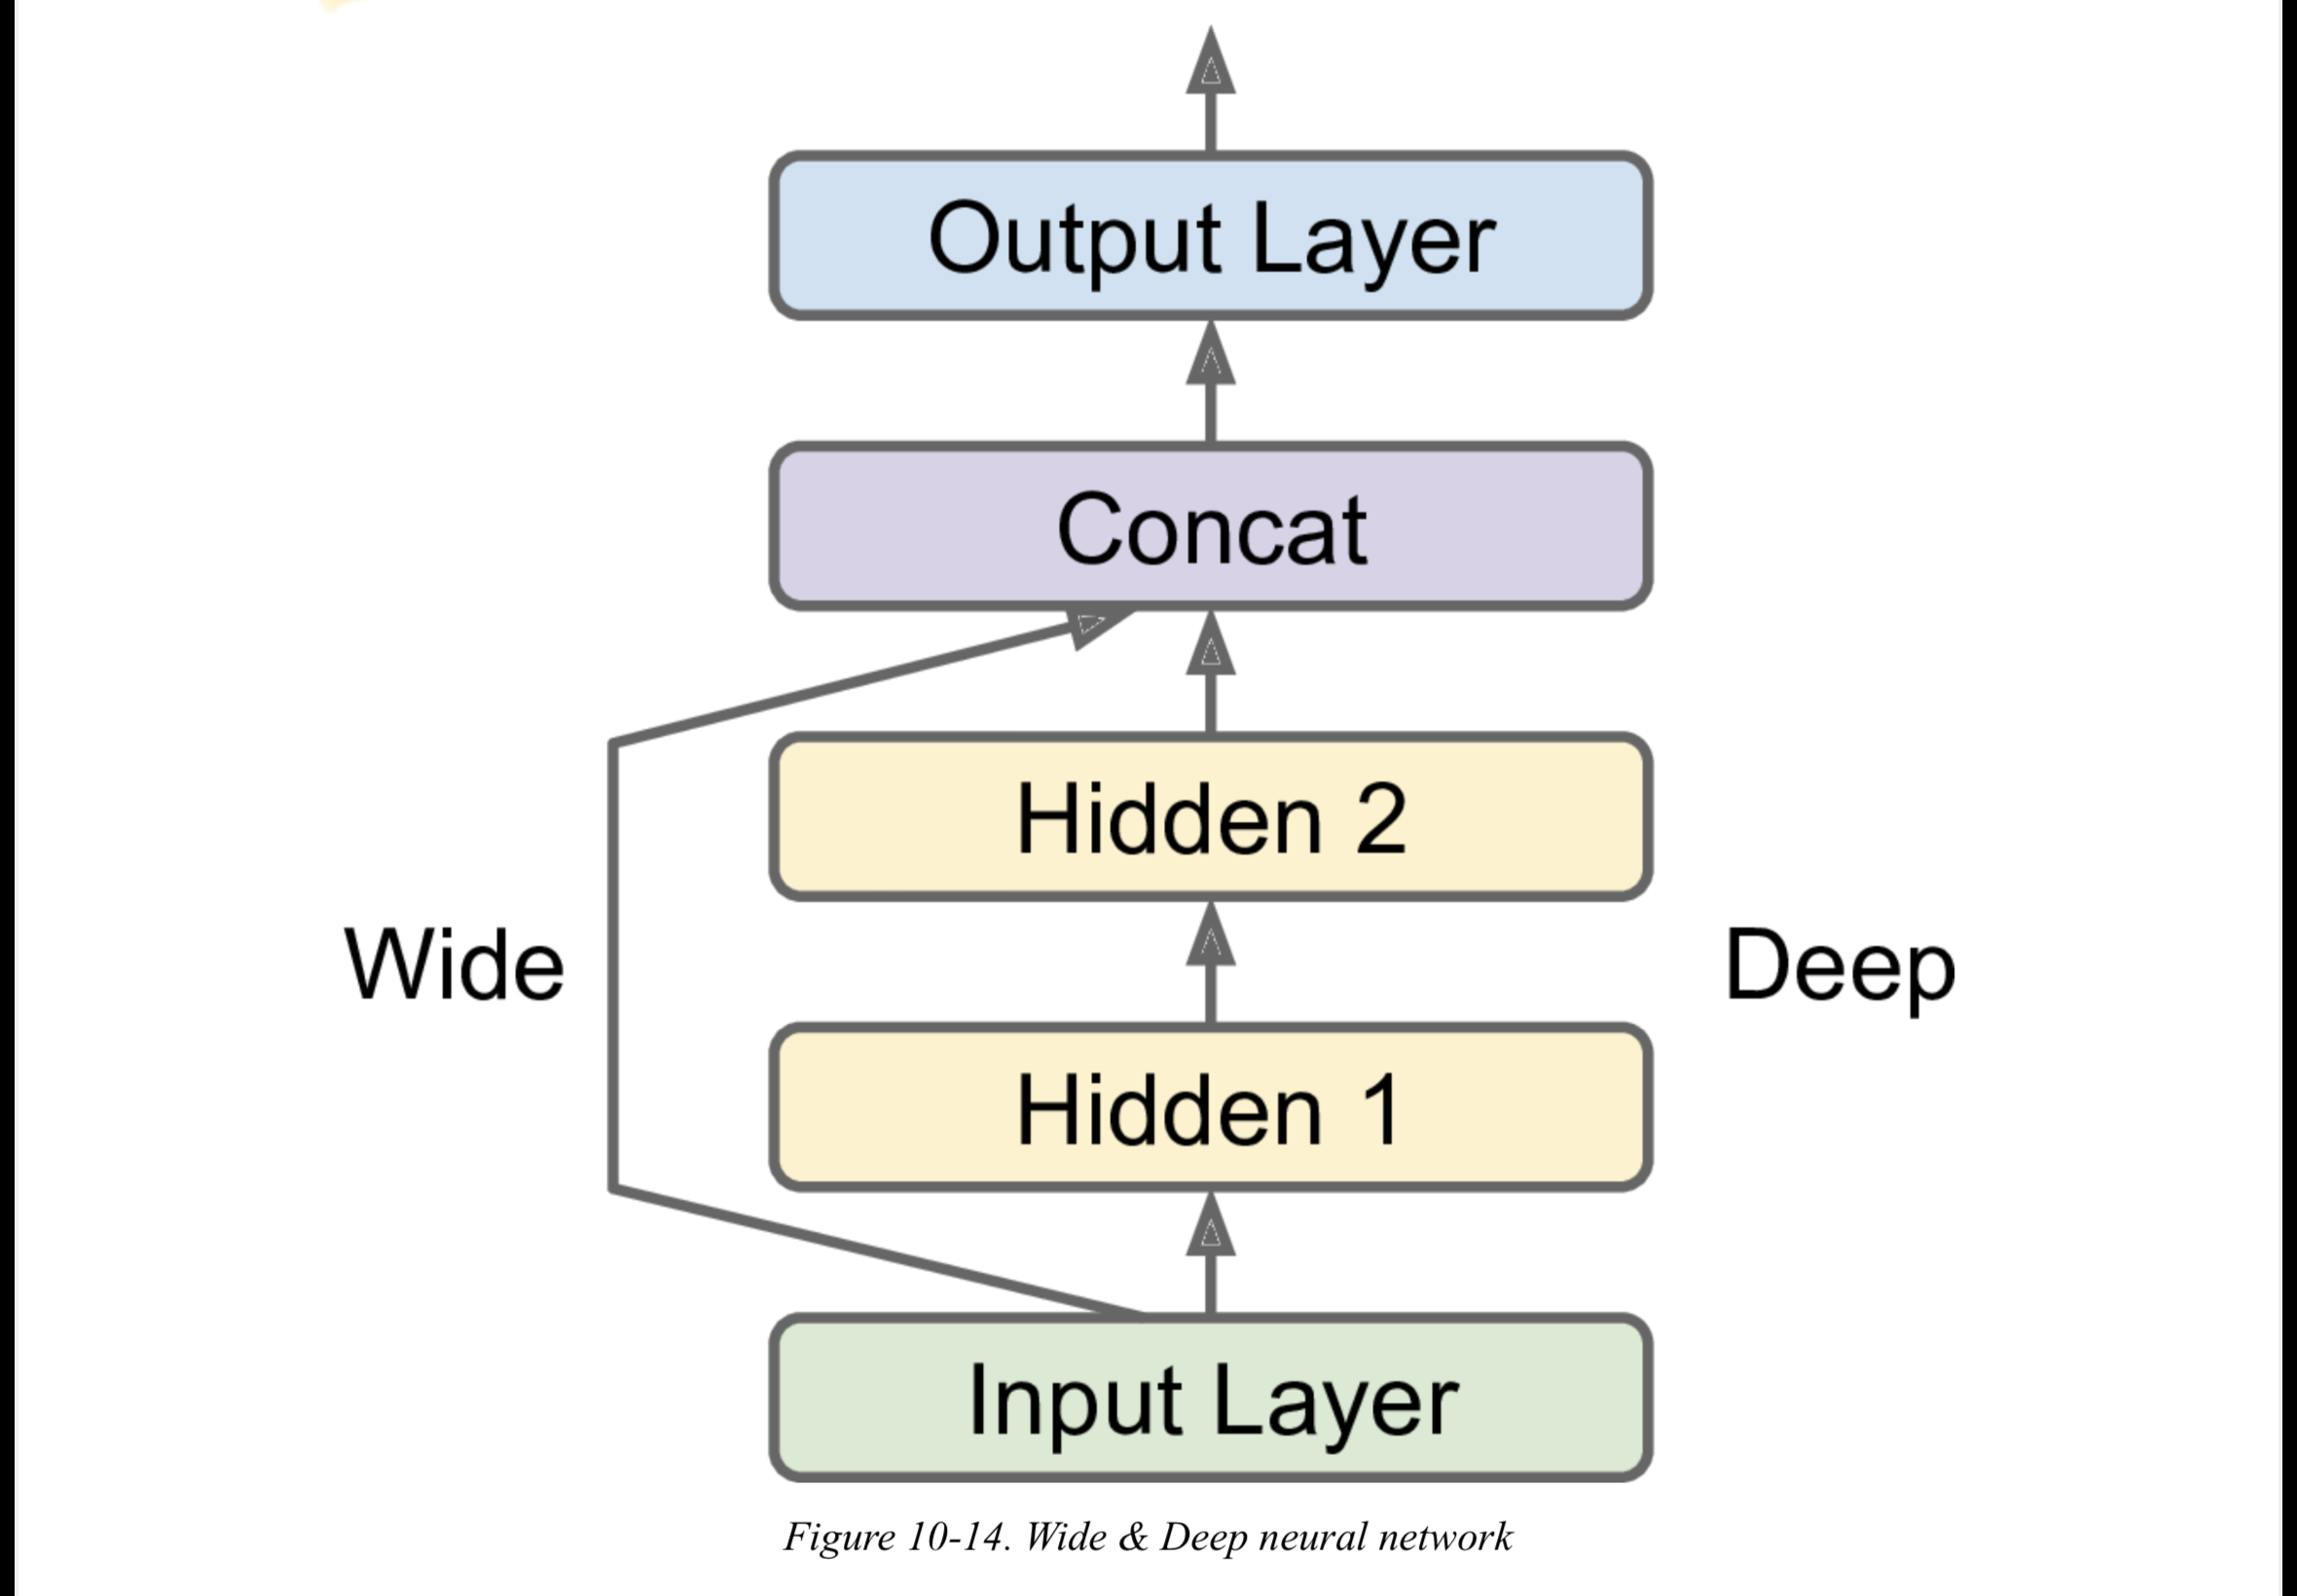

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
# First, we need to creat an Input object. This is a specification of input the model will get, including its shape and dtype.
# A model may actually have multiple inputs.

hidden1 = keras.layers.Dense(30, activation="relu")(input_)
# This is the first hidden layer which is a Dense layer with 30 neurons and ReLU activation function.
# Notice that we call it like a function, passing it the input. This is why it's called the Functional API.

hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# Then we create a second hidden layer, and again we use it as a function. 
# This time, we pass the output of the first hidden layer.

concat = keras.layers.concatenate([input_, hidden2])
# This is a Concatenate layer and it's once again used like a function.
# This concatenates the input and the output of the second hidden layer.

output = keras.layers.Dense(1)(concat)
# Then we create the output layer, with a single neuron and no activation function, and we again use it like a function.
# We pass the output of the concatenation.

model = keras.models.Model(inputs=[input_], outputs=[output])
# Lastly, we create a Keras model specifying which inputs and outputs to use.

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [ ]:
# Compiling
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))


# Training and evaluation
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)


# Prediction
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 887us/step - loss: 1.9731 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 683us/step - loss: 0.7638 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 687us/step - loss: 0.6045 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 709us/step - loss: 0.5862 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 707us/step - loss: 0.5452 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 672us/step - loss: 0.5243 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 681us/step - loss: 0.5185 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 700us/step - loss: 0.4947 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 675us/step - loss: 0.4782 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 693us/step - loss: 0.470

## Handling multiple inputs

What if you want to send different subsets of input features through the wide or deep paths?

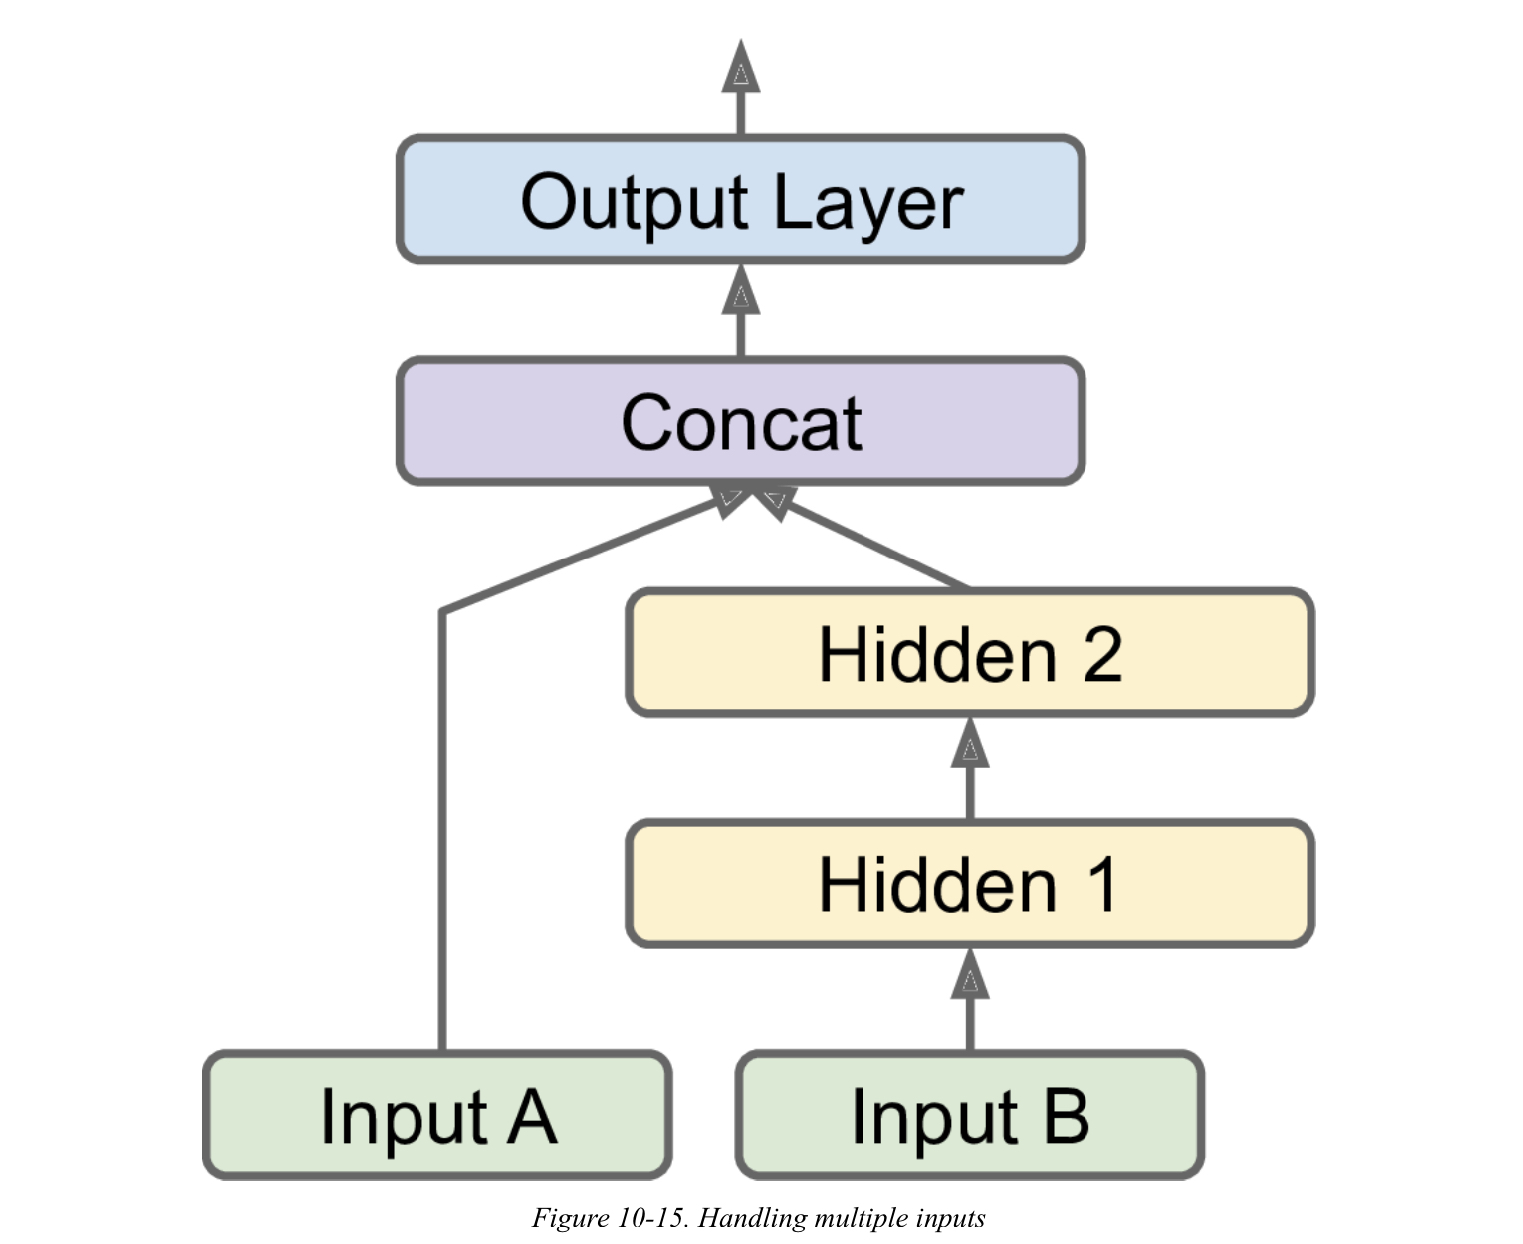

**In this case, we can use multiple inputs.**

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

**For example, we will send input_A through the wide path (no hidden layers), and input_B through the deep path.**

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")  
input_B = keras.layers.Input(shape=[6], name="deep_input")
# We should name at least the most important layers like these

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)

hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="output")(concat)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

Before we fit, evaluate and predict,

**We MUST pass A PAIR OF MATRICES (X_train_A and X_train_B): one per input.**

The same is true for validation and test sets.

In [ ]:
# Compiling
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))


# Training and evaluation
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)


# Prediction
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 934us/step - loss: 3.1941 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 0s 734us/step - loss: 0.7247 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 0s 719us/step - loss: 0.6176 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 0s 718us/step - loss: 0.5799 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 0s 689us/step - loss: 0.5409 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 0s 717us/step - loss: 0.5173 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 0s 708us/step - loss: 0.5186 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 0s 697us/step - loss: 0.4977 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 0s 713us/step - loss: 0.4765 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 0s 723us/step - loss: 0.467

There are many use cases in which you may want to have multiple outputs:

• The task may demand it. For instance, you may want to locate and classify the main object in a picture. This is both a regression task (finding the coordinates of the object's center, as well as its width and height) and a classification task.

• Similarly, you may have multiple independent tasks based on the same data. In many cases, you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks. For example, you could perform multitask classification on pictures of faces, using one output to classify the person's facial expression (smiling, surpirse, etc.) and another output to identify whether they are wearing glasses or not.

• It can be used as a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model's ability to generalize). For example, you may want to add some auxiliary outputs in a neural network architecture to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

## Adding an auxiliary output for regularization

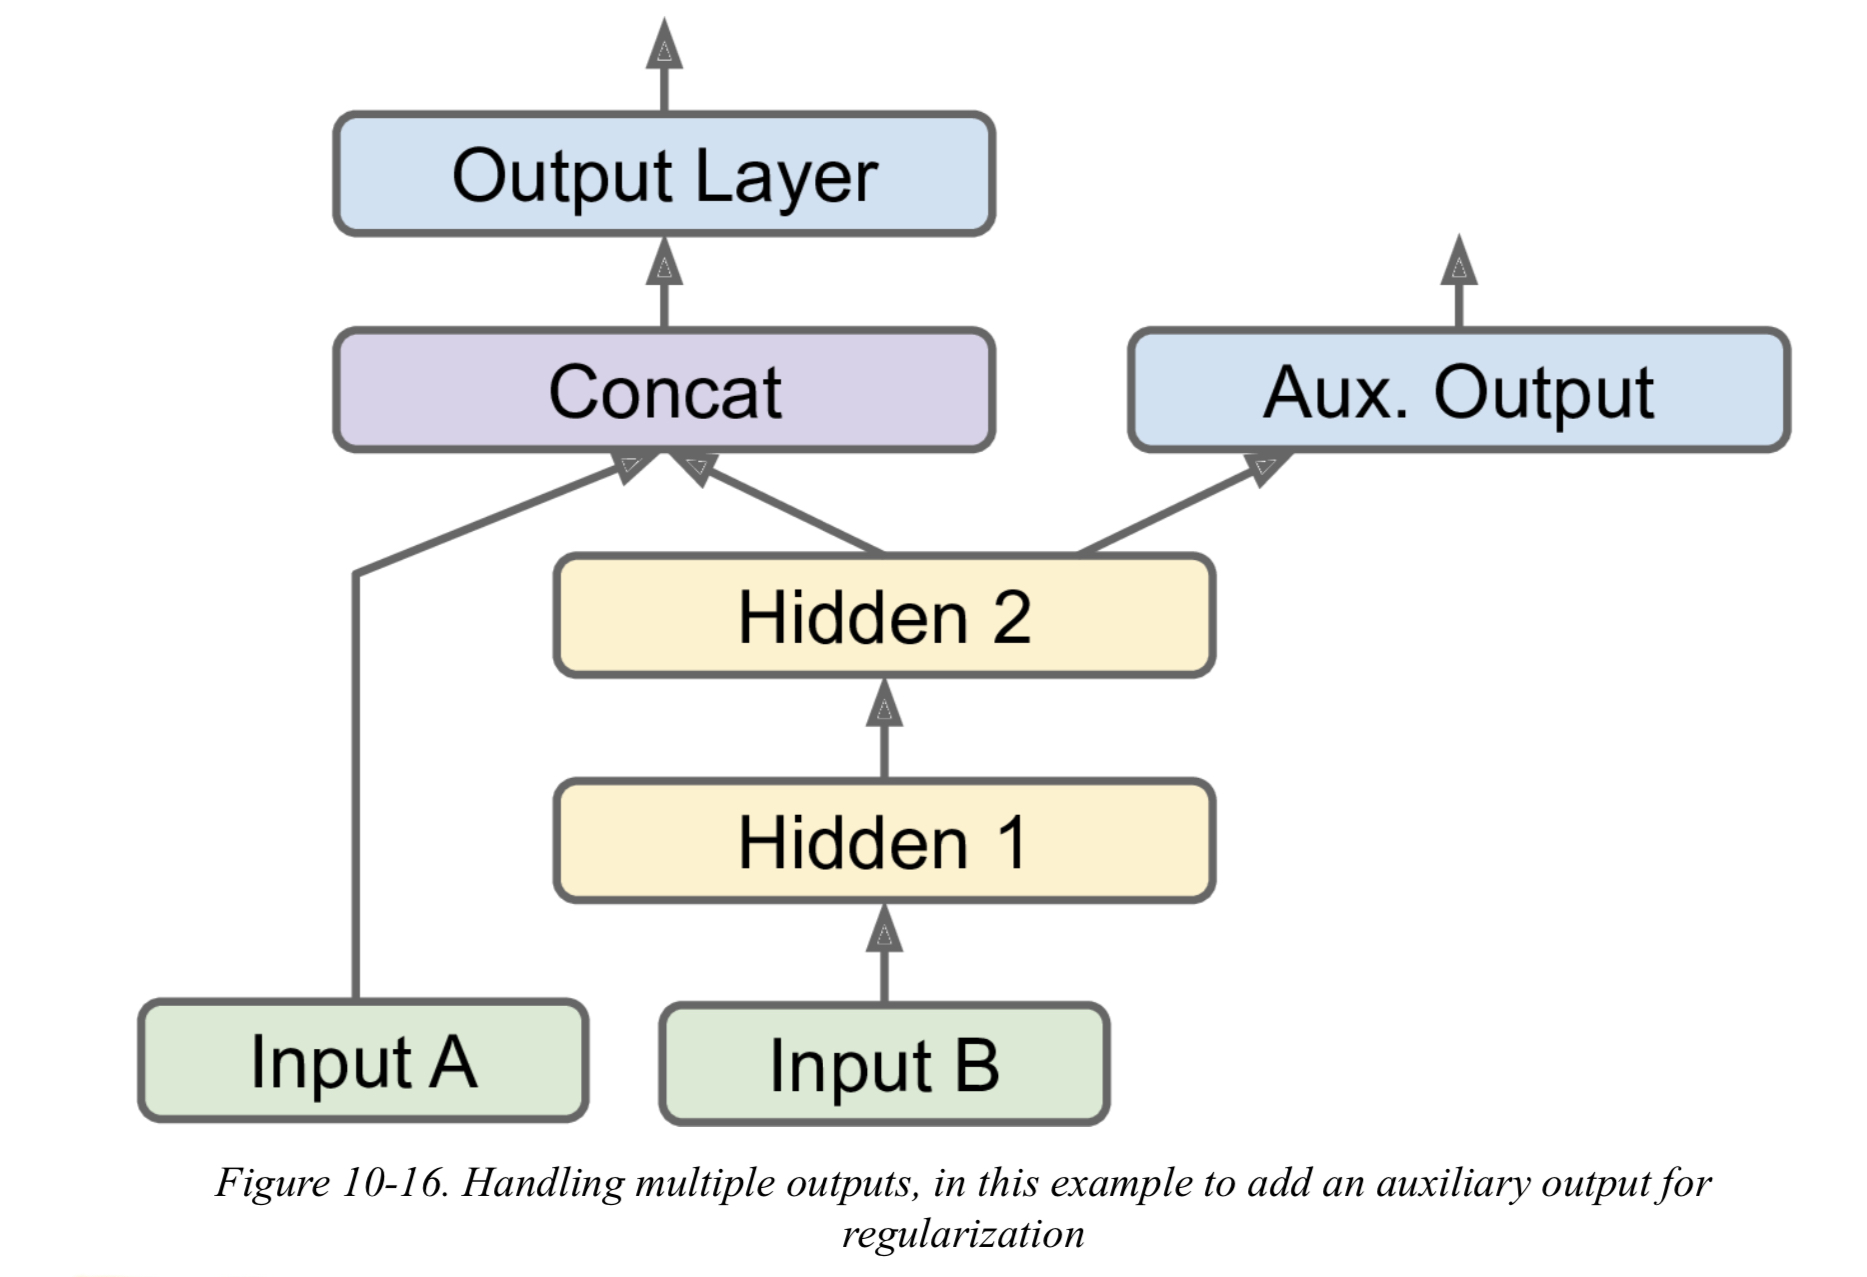

We can just connect the aux. output to the appropriate layers and add them to your model's list of outputs.

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [29]:
# Compiling
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

Each output will need its own loss function. Therefore, when we compile the model, we should pass a list of losses. By default, Keras will compute all these losses and simply add them up to get the final loss used for training. We care much more about the main output than about the aux. output because it's only used for regularization. So we want to give the main output's loss a much greater weight. We can set all the loss weights when compiling the model.

In [30]:
# Training and evaluation
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,  # using y_train for both so that aux. output has the same label
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])) # using y_valid for both for the same reason

NameError: ignored

When we train the model, we need to provide labels for each output. In this example, the main output and the auxiliary output should try to predict the same thing, so they should use the same labels.

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 546us/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


When we evaluate the model, Keras will return the total loss, as well as all the individual losses.

In [ ]:
# Prediction
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Similarly, predict() will return predictions for each output.

# The subclassing API

Both the Sequential API and the Functional API are declarative: you start by declaring which layers you want to use and how they should be connected, and only then can you start feeding the model some data for training or inference. This has many advantages: the model can easily be saved, cloned and shared; its structure can be displayed and analyzed; the framework can infer shapes and check types, so errors can be caught early (i.e., before any data ever goes through the model). It's also fairly easy to debug, since the whole model is a static graph of layers. But the flip side is just that: it's static.

Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. For such cases, or simply if you prefer a more imperative programming style, the Subclassing API is for you.

Simply subclass the Model class, create the layers you need in the constructor, and use them to perform the computations you want in the call() method.

For example, creating an instance of the folowing WideAndDeepModel class gives us an equivalent model to the one we just built with the Functional API. You can then compile it, evaluate it, and use it to make productions.

In [ ]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [ ]:
# Compiling
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))


# Training and evaluation
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))


# Prediction
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 3.3855 - output_1_loss: 3.3304 - output_2_loss: 3.8821 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 0s 852us/step - loss: 1.0790 - output_1_loss: 0.9329 - output_2_loss: 2.3942 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 0s 885us/step - loss: 0.8644 - output_1_loss: 0.7583 - output_2_loss: 1.8194 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 0s 863us/step - loss: 0.7850 - output_1_loss: 0.6979 - output_2_loss: 1.5689 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - 0s 843us/step - loss: 0.7294 - output_1_loss: 0.6499 - output_2_loss: 1.4452 - val_loss: 1.1357 - val_output_1_loss: 0.596

This example looks very much like the Functional API, except we do not need to create the inputs; we just use the input argument to the call() method, and we separate the creation of the layers in the constructor from their usage in the call() method. The big difference is that you can do pretty much anything you want in the call() method. 

This is discussed in ch12 in more detail.

But this flexibility may be too much for one can handle. You might be better off sticking to the Sequential API or the Functional API unless you really need that flexibility.

# Saving and Restoring

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [ ]:
# Compiling
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))


# Training and evaluating
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 882us/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 646us/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 658us/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 653us/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 649us/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 664us/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 677us/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 649us/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 676us/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 497us/step - loss: 0.438

Keras will use the HDF5 format to save both the model's architecture and the values of all the model parameters for every layer. It also saves the optimizer and its parameters as well.

In [ ]:
model.save("my_keras_model.h5")  # Saving the model

In [ ]:
model = keras.models.load_model("my_keras_model.h5")  # Loading the model

Note that this only works for Sequential API or the Functional API, but not when using model subclassing. It's all manual in that case.

In [ ]:
model.predict(X_new)

array([[0.5400236],
       [1.6505969],
       [3.0098243]], dtype=float32)

In [ ]:
model.save_weights("my_keras_weights.ckpt")  # Saving the weights manually

In [ ]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

What if we want to stop mid-training? What if the computer crashes mid way?

You can save the training process before such events using callbacks.

The fit() method accepts a 'callbacks' argument that lets you specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch.

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))


checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
# ModelCheckpoint callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch.
# 'save_best_only=True' will only save your model when its performance on the validation set is the best so far.
# This way, you don't need to worry about training for too long and overfitting the training set: simply restore the last model saved
# after training, and this will be the best model on the validation set.


history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 846us/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 672us/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 658us/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 651us/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 670us/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 658us/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 682us/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 657us/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 672us/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 460us/step - loss: 0.438

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))


early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
# You can also implement early stopping by .EarlyStopping callback.
# It will interrupt training when it measures no progress on the validation set for a number of epochs, and it will optionally
# roll back to the best model. You can combine both callbacks to save checkpoints of your model and interrupt training early
# when there's no progress to avoid wasting time and resources.


history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 878us/step - loss: 0.4578 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 702us/step - loss: 0.4430 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 676us/step - loss: 0.4376 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 0s 671us/step - loss: 0.4361 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 674us/step - loss: 0.4204 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 672us/step - loss: 0.4112 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 671us/step - loss: 0.4226 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 0s 659us/step - loss: 0.4135 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 661us/step - loss: 0.4039 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 0s 655us/step - l

The number of epochs can be set to a large number since training will stop automatically when there is no more progress. In this case, there's no need to restore the best model saved because the EarlyStopping callback will keep track of the best weights and restore them for you at the end of training.

You can also write your own custom callbacks. The following custom callback will display the ratio between the validation loss and the training loss during training to detect overfitting.

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

Note that you can also implement this for: on_train_begin(), on_train_end(), on_epoch_begin(), on_epoch_end(), on_batch_begin(), on_batch_end().

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

363/363 [==============================] - 0s 799us/step - loss: 0.3302 - val_loss: 0.3556

val/train: 1.08


Callbacks can also be used during evaluation and predictions if you needed (e.g., for debugging).

# TensorBoard for visualization

TensorBoard is a great interactive visualization tool that you can use to view the learning curves during training, compare learning curves between multiple runs, visualize the computation graph, analyze training statistics, view images generated by your model, visualize complex multidimensional data projected down to 3D and automatically clustered for you.

To use it, you must modify your program so that it outputs the data you want to visualize to special binary log files called event files. Each binary data is record is called a summary. The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations: this allows you to visualize live data, such as the learning curves during training.

In general, you want to point the TensorBoard server to a root log directory and configure your program so that it writes to a different subdirectory every time it runs. This way, the same TensorBoard server instance will allow you to visualize and compare data from multiple runs of your program, without getting everything mixed up.

Let's start by defining the root log directory we will use for our TensorBoard logs, plus a small function that will generate a subdirectory path based on the current date and time so that it's different at every run. You may want to include extra information in the log directory name, such as hyperparameter values that you are testing, to make it easier to know what you are looking at in TensorBoard.

In [ ]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [ ]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2021_02_13-18_39_20'

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

Keras provides a TensorBoard() callback

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 927us/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 695us/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 668us/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 672us/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 692us/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 755us/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 0s 697us/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 0s 668us/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 0s 681us/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 0s 701us/step - loss: 0.454

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [ ]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2021_02_13-18_39_31'

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.7645 - val_loss: 302.8536
Epoch 2/30
363/363 [==============================] - 0s 713us/step - loss: 8159520618.2209 - val_loss: 1.3230
Epoch 3/30
363/363 [==============================] - 0s 735us/step - loss: 1.3439 - val_loss: 1.3176
Epoch 4/30
363/363 [==============================] - 0s 738us/step - loss: 1.3546 - val_loss: 1.3261
Epoch 5/30
363/363 [==============================] - 0s 712us/step - loss: 1.3513 - val_loss: 1.3154
Epoch 6/30
363/363 [==============================] - 0s 724us/step - loss: 1.3274 - val_loss: 1.3203
Epoch 7/30
363/363 [==============================] - 0s 693us/step - loss: 1.3639 - val_loss: 1.3149
Epoch 8/30
363/363 [==============================] - 0s 709us/step - loss: 1.3487 - val_loss: 1.3157
Epoch 9/30
363/363 [==============================] - 0s 681us/step - loss: 1.3445 - val_loss: 1.3150
Epoch 10/30
363/363 [==============================] - 0s 681us/step - lo

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [ ]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning

One can simply try many combinations of hyperparameters and see which one works best on the validation set or use K-fold CV such as GridsearchCV or RandomizedSearchCV to explore the hyperparameter space. To do this we need to wrap our Keras models in objects that mimic regular Scikit-Learn regressors. 

The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters.

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

The hyperparmeters to tune here are: input_shape, n_hidden, and n_neurons.

It compiles it using an SGD optimizer configured with the specified learning rate. It is good practice to provide reasonable defaults to as many hyperparameters as you can.

Next, let's create a KerasRegressor based on this build_model() function.

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

The KerasRegressor object is a thin wrapper around the Keras model built using build_model(). Since we did not specify any hyperparameters when creating it, it will use the default hyperparameters we defined in build_model(). 

Now we can use this object like a regular Scikit-Learn regressor: we can train it using its fit() method, then evaluate it using its score() method, and use it to make predictions using its predict() method.

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 0s 905us/step - loss: 1.5673 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 0s 665us/step - loss: 1.3216 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 0s 671us/step - loss: 0.5972 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 0s 661us/step - loss: 0.4985 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 0s 687us/step - loss: 0.4608 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 0s 678us/step - loss: 0.4410 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 0s 676us/step - loss: 0.4463 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 686us/step - loss: 0.4283 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 0s 660us/step - loss: 0.4139 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 681us/step - 

In [ ]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 417us/step - loss: 0.3409


In [ ]:
y_pred = keras_reg.predict(X_new)

Note that any extra parameter you pass to the fit() method will get passed to the underlying Keras model. Also, the score will be the opposite of MSE because Scikit-Learn wants scores, not losses (i.e., higher should be better).

Since there are many hyperparameters, it is preferable to use a randomized search rather than grid search. Let's try to explore the number of hidden layers, the number of neurons, and the learning rate.

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

**Warning**: the following cell crashes at the end of training. This seems to be caused by [Keras issue #13586](https://github.com/keras-team/keras/issues/13586), which was triggered by a recent change in Scikit-Learn. [Pull Request #13598](https://github.com/keras-team/keras/pull/13598) seems to fix the issue, so this problem should be resolved soon. In the meantime, I've added `.tolist()` and `.rvs(1000).tolist()` as workarounds.

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3827 - val_loss: 0.4703
Epoch 2/100
242/242 [==============================] - 0s 757us/step - loss: 0.4880 - val_loss: 0.4247
Epoch 3/100
242/242 [==============================] - 0s 765us/step - loss: 0.4541 - val_loss: 0.4052
Epoch 4/100
242/242 [==============================] - 0s 745us/step - loss: 0.4518 - val_loss: 0.3975
Epoch 5/100
242/242 [==============================] - 0s 765us/step - loss: 0.4337 - val_loss: 0.3991
Epoch 6/100
242/242 [==============================] - 0s 751us/step - loss: 0.4263 - val_loss: 0.4031
Epoch 7/100
242/242 [==============================] - 0s 743us/step - loss: 0.4385 - val_loss: 0.4043
Epoch 8/100
242/242 [==============================] - 0s 780us/step - loss: 0.4301 - val_loss: 0.3929
Epoch 9/100
242/242 [==============================] - 0s 792us/step - loss: 0.4108 - val_loss: 0.4040
Epoch 10/100
2

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fd939643c10>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.0...
                                                          0.00502142573

In [ ]:
rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.005803602934201024}

In [ ]:
rnd_search_cv.best_score_

-0.32039451599121094

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 436us/step - loss: 0.3029


-0.3028871417045593

In [ ]:
model = rnd_search_cv.best_estimator_.model  # The trained Keras model
model

In [ ]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 446us/step - loss: 0.3029


0.3028871417045593

The exploration may last many hours, depending on the hardware, the size of the dataset, the complexity of the model, and the values of n_iter and cv.

Using randomized search is not too hard and works well for many simple problems. When training is slow however, this approach will only explore a tiny portion of the hyperparameter space. You can partially alleviate this problem by assisting the search process manually:

First run a quick random search using wide ranges of hyperparameter values, then another search using smaller ranges of values centered on the best ones found during the first one and so on. 

This approach will hopefully zoom in on a good set of hyperparameters. However, it is very time consuming.

There are many more techniques to explore a search space more efficiently than randomly. The core idea is: when a region turns out to be good, it should be explored more. Such techniques take care of the 'zooming' process for you and lead to much better solutions in much less time.

For more info. about hyperparameter tuning, check the Note.

# Exercise solutions

## 1. to 9.

See appendix A.

## 10.

*Exercise: Train a deep MLP on the MNIST dataset (you can load it using `keras.datasets.mnist.load_data()`. See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.*

Let's load the dataset:

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels:

In [ ]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is also represented as a byte (0 to 255):

In [ ]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let's plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

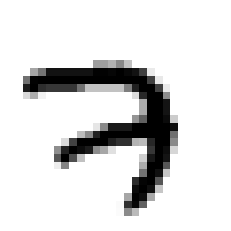

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don't need a `class_names` array:

In [ ]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

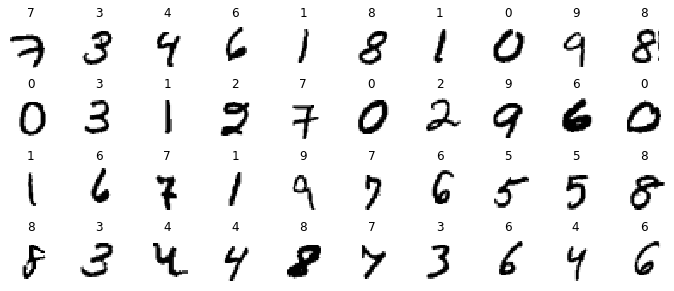

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch:

In [ ]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 2s 1ms/step - loss: 4.6604 - accuracy: 0.4887 - val_loss: 2.3911 - val_accuracy: 0.1126


We can now plot the loss as a functionof the learning rate:

Text(0, 0.5, 'Loss')

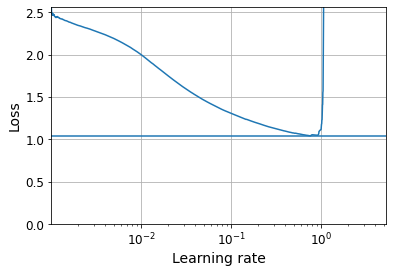

In [ ]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [ ]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4195 - accuracy: 0.8677 - val_loss: 0.0995 - val_accuracy: 0.9724
Epoch 2/100
1719/1719 [==============================] - 2s 882us/step - loss: 0.0941 - accuracy: 0.9698 - val_loss: 0.0913 - val_accuracy: 0.9746
Epoch 3/100
1719/1719 [==============================] - 1s 845us/step - loss: 0.0650 - accuracy: 0.9792 - val_loss: 0.0785 - val_accuracy: 0.9772
Epoch 4/100
1719/1719 [==============================] - 2s 932us/step - loss: 0.0438 - accuracy: 0.9855 - val_loss: 0.0793 - val_accuracy: 0.9784
Epoch 5/100
1719/1719 [==============================] - 1s 832us/step - loss: 0.0348 - accuracy: 0.9888 - val_loss: 0.0724 - val_accuracy: 0.9812
Epoch 6/100
1719/1719 [==============================] - 1s 835us/step - loss: 0.0289 - accuracy: 0.9905 - val_loss: 0.0814 - val_accuracy: 0.9792
Epoch 7/100
1719/1719 [==============================] - 1s 868us/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0

In [ ]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 701us/step - loss: 0.0804 - accuracy: 0.9806


[0.08043695986270905, 0.9805999994277954]

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [ ]:
%tensorboard --logdir=./my_mnist_logs --port=6006